In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
print(sns.get_dataset_names())         # List all datasets
df = sns.load_dataset('titanic')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Histogram Plot -> Frequencies Plot

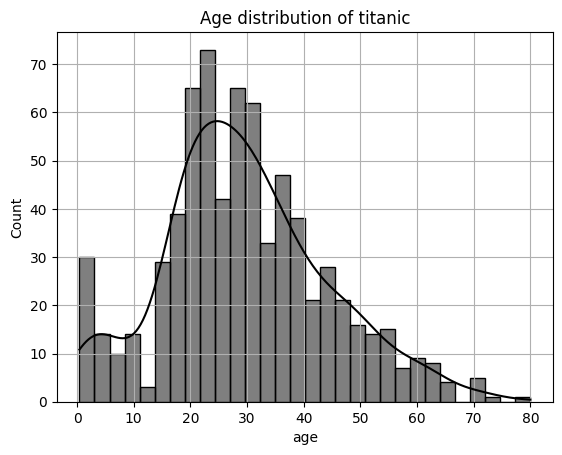

In [6]:
sns.histplot(data=df, x='age', kde=True, bins=30, color='black')
plt.title('Age distribution of titanic')
plt.grid(True)
plt.show()

In [7]:
df['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

CountPlot

Its also a frequency plot but there two parameters will be there like in a Society -> lower, middle, upper classes are there and then how many males and females are there in those classes - like that we use this countPlot

countplot from Seaborn does exactly that:

    x="class" → groups the bars by the class category (e.g., lower, middle, upper).
    hue="sex" → splits each group into sub-bars for male and female.
    palette="Set2" → just controls the color scheme.

So the output will be:

    X-axis: categories of "class" (like lower, middle, upper).
    Y-axis: frequency (count) of observations in each class.
    Hue: different colors for "sex" (male vs. female) in each class.

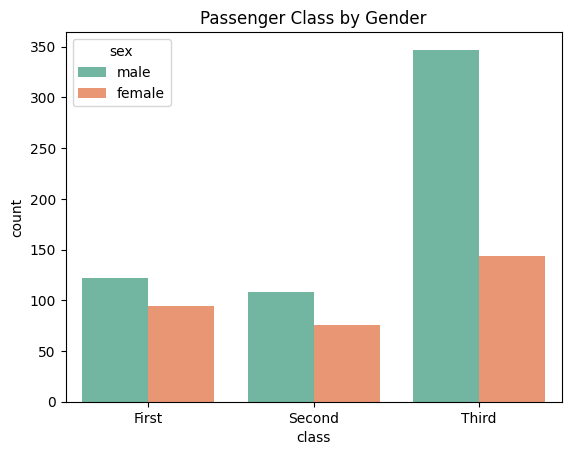

In [8]:
sns.countplot(data=df, x="class", hue="sex", palette="Set2")
plt.title("Passenger Class by Gender")
plt.show()

Boxplot (Seaborn sns.boxplot)

A boxplot visualizes the distribution of a numerical variable for different categories. It summarizes the data using five key statistics:

    Minimum (excluding outliers)
    First quartile (Q1) — 25% of data is below this value
    Median (Q2) — the middle value
    Third quartile (Q3) — 75% of data is below this value
    Maximum (excluding outliers)
Parts of the plot:

    Box → spans Q1 to Q3 (the interquartile range, IQR).
    Line inside box → the median.
    Whiskers → extend to the smallest and largest values within 1.5 × IQR from Q1 and Q3.
    Points beyond whiskers → outliers.
Seaborn parameters in your example:

sns.boxplot(data=df, x="class", y="age", palette="coolwarm")

    x="class" → categorical variable for grouping (e.g., passenger class).
    y="age" → numerical variable whose distribution is shown.
    palette="coolwarm" → color scheme for the boxes.
If hue is added (e.g., hue="sex"), boxplots are drawn side-by-side for each subgroup within the main category, letting you compare distributions across two categorical variables.

/tmp/ipykernel_24409/1676809040.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="class", y="age", palette="coolwarm")


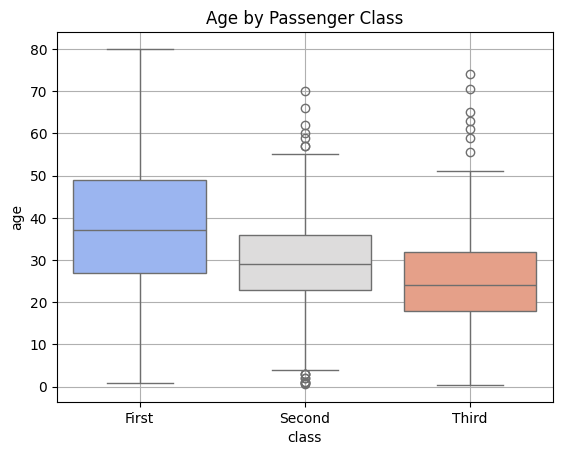

In [9]:
sns.boxplot(data=df, x="class", y="age", palette="coolwarm")
plt.title("Age by Passenger Class")
plt.grid(True)
plt.show()

**Violin Plot (`sns.violinplot`)**
A violin plot combines aspects of a **boxplot** and a **kernel density plot** to show the **distribution of a numerical variable** across categories.

**What it shows:**

* The **shape** of the distribution — wider sections mean more data points in that range.
* The **median** and **interquartile range** (like a boxplot, if `inner='box'` is used — Seaborn shows this by default).
* Potential **skewness** or **multi-modal patterns** that a boxplot might hide.

**Parts of the plot:**

* **Violin shape** → smoothed density estimate of the data for that category.
* **White dot** (default) → median.
* **Thick bar** → interquartile range (Q1 to Q3).
* **Thin line** → whiskers (min/max values excluding outliers).

**Your code:**

```python
sns.violinplot(data=df, x="class", y="age", palette="pastel")
plt.title("Age Distribution by Class (Violin)")
plt.show()
```

* `x="class"` → categories (e.g., passenger class).
* `y="age"` → numerical variable (distribution shown for each class).
* `palette="pastel"` → light, soft colors for aesthetics.

If you add `hue="sex"`, you can compare **two categorical groups** (e.g., male/female) within each violin side-by-side or split into halves with `split=True`.

---

In short — violin plots are like *boxplots with personality*; they show **how much** data is in each value range, not just where the quartiles are.


/tmp/ipykernel_24409/2483467091.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="class", y="age", palette="pastel")


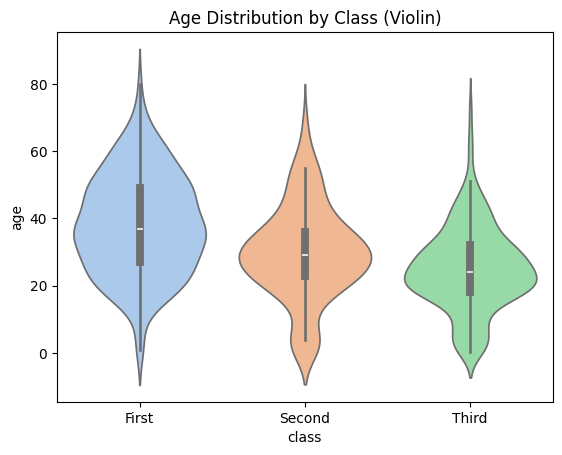

In [10]:
sns.violinplot(data=df, x="class", y="age", palette="pastel")
plt.title("Age Distribution by Class (Violin)")
plt.show()

**Bar Plot (`sns.barplot`)**
A bar plot in Seaborn shows the **average value** of a numerical variable for each category of a categorical variable. It’s different from `countplot` (which shows raw counts) because here the **height of the bar = mean of the `y` variable**.

**What it shows:**

* Mean (average) of the numerical variable for each category.
* Optional **error bars** to represent uncertainty or variability (controlled by `ci` parameter).

**Parts of the plot:**

* **Bar height** → average value of `y` for that category.
* **Error bars** → by default, 95% confidence intervals; with `ci="sd"`, it shows ±1 standard deviation instead.

**Your code:**

```python
sns.barplot(data=df, x="sex", y="survived", ci="sd", palette="Blues")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.show()
```

* `x="sex"` → categories (male, female).
* `y="survived"` → numerical variable (0 = didn’t survive, 1 = survived).
* `ci="sd"` → error bars show the standard deviation instead of confidence intervals.
* `palette="Blues"` → shades of blue for bars.

Since `survived` is binary, the **bar height represents the proportion (probability) of survival** for each gender — essentially the mean of the `survived` column within each group.

---

If you wanted raw survival **counts** instead of probabilities, you’d use:

```python
sns.countplot(data=df, x="sex", hue="survived")
```

That would show total survivors/non-survivors per gender.


/tmp/ipykernel_24409/4265036247.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="sex", y="survived", ci="sd", palette="Blues") # ci=None or ci=95
/tmp/ipykernel_24409/4265036247.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="sex", y="survived", ci="sd", palette="Blues") # ci=None or ci=95


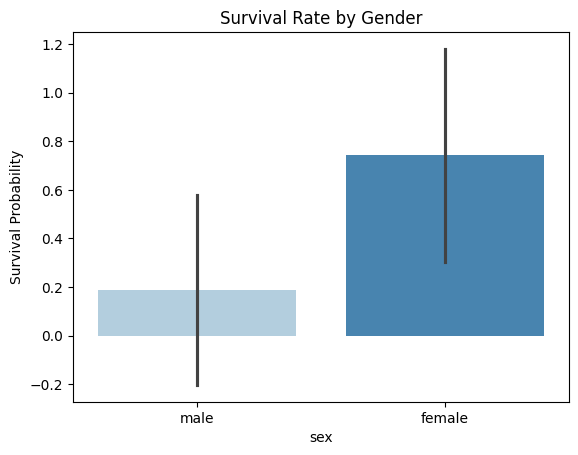

In [11]:
sns.barplot(data=df, x="sex", y="survived", ci="sd", palette="Blues") # ci=None or ci=95
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.show()

**Strip Plot (`sns.stripplot`)**
A strip plot shows **individual data points** for a numerical variable across categories, letting you see the raw distribution instead of just a summary statistic.

**What it shows:**

* Each point represents one observation in the dataset.
* Points are plotted along a category on the X-axis (or Y-axis if flipped).
* Useful for small/medium datasets where showing all points is possible.

**Your code:**

```python
sns.stripplot(data=df, x="class", y="age", jitter=True, alpha=0.5)
plt.title("Age Stripplot by Class")
plt.show()
```

* `x="class"` → categories (e.g., passenger classes).
* `y="age"` → numerical values (ages of passengers).
* `jitter=True` → spreads points horizontally within each category to avoid excessive overlap.
* `alpha=0.5` → makes points semi-transparent so overlapping points are visible.

**Interpretation:**

* The vertical spread of points in each class shows the **range of ages**.
* Dense clusters indicate where most ages fall.
* Outliers stand apart from the main cluster.

**Tip:**

* You can add `hue="sex"` to color points by gender.
* If there’s too much overlap, `sns.swarmplot` arranges points to avoid collisions while still showing every observation.

---

So in short — `stripplot` is the *"show me every single dot"* version of the `boxplot` or `violinplot`.


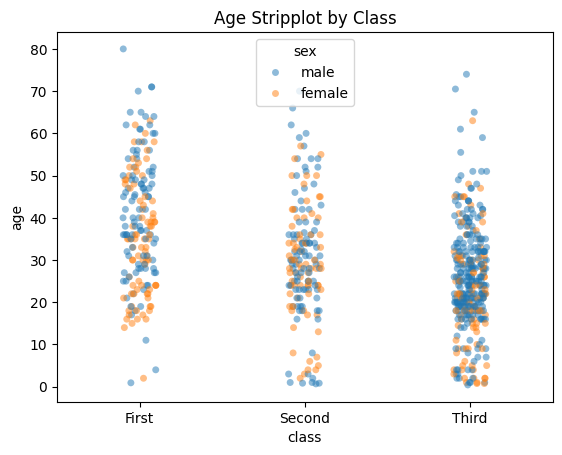

In [20]:
sns.stripplot(data=df, x="class", y="age", jitter=True, alpha=0.5, hue='sex')
# sns.swarmplot(data=df, x="class", y="age", alpha=0.5, hue='sex')
plt.title("Age Stripplot by Class")
plt.show()

In [24]:
df = sns.load_dataset("penguins")

**Relational Plot (`sns.relplot`)**
`relplot` is a **figure-level** function in Seaborn for visualizing relationships between two numerical variables, with the ability to map additional variables to color, marker style, and point size.
It is a flexible wrapper around `sns.scatterplot` (when `kind="scatter"`) or `sns.lineplot` (when `kind="line"`).

**Your code:**

```python
df = sns.load_dataset("penguins")

sns.relplot(
    data=df,
    x="flipper_length_mm",   # numeric variable on X-axis
    y="body_mass_g",         # numeric variable on Y-axis
    hue="species",           # color encodes species
    style="sex",              # marker shape encodes sex
    size="bill_length_mm",    # point size encodes bill length
    kind="scatter"            # scatter plot type
)

plt.title("Flipper Length vs Body Mass")
plt.show()
```

**What each argument does:**

* **`x` & `y`** → main numerical relationship to plot.
* **`hue="species"`** → colors differentiate penguin species.
* **`style="sex"`** → marker shape (e.g., circle vs. triangle) indicates male vs. female.
* **`size="bill_length_mm"`** → point size proportional to bill length.
* **`kind="scatter"`** → ensures it’s a scatter plot (default for `relplot`).

**Interpretation:**

* The plot shows how **flipper length** relates to **body mass** for penguins, while also letting you see differences by species, sex, and bill length — all in a single visualization.
* For example, you might see that certain species tend to be heavier with longer flippers, and that males/females have distinct size patterns.

**Why use `relplot` instead of `scatterplot` here?**

* `relplot` is figure-level, meaning it works well with facets (`col`, `row` parameters) to make subplots for different categories automatically.
* It handles multiple encodings (hue, size, style) in a clean way with a built-in legend.

---

If you wanted to break this plot into **separate panels by species**, you could just add:

```python
sns.relplot(..., col="species")
```

and it would automatically create one subplot per species.


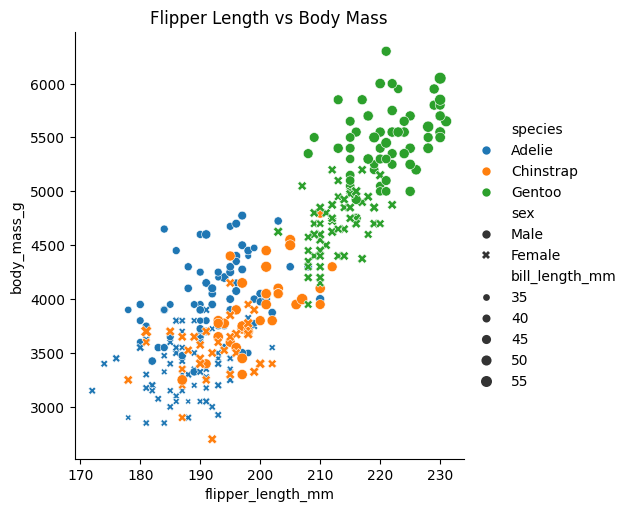

In [29]:
sns.relplot(data=df, x="flipper_length_mm", y="body_mass_g",
            hue="species", style="sex", size="bill_length_mm", kind="scatter")

plt.title("Flipper Length vs Body Mass")
plt.show()

**Regression Plot (`sns.regplot`)**
A regression plot shows both the **scatterplot** of data points and the **best-fit regression line** (with optional confidence interval) to visualize the relationship between two numerical variables.

**What it shows:**

* **Dots** → individual observations (the raw data).
* **Line** → the line of best fit from a simple linear regression (least squares).
* **Confidence band** → shaded area around the line (by default, 95% CI for the regression estimate).

**Your code:**

```python
sns.regplot(
    data=df,
    x="bill_length_mm",
    y="body_mass_g",
    scatter_kws={"alpha": 0.5},  # make points semi-transparent
    line_kws={"color": "red"}    # regression line in red
)

plt.title("Regression: Bill Length vs Body Mass")
plt.show()
```

* `x="bill_length_mm"` → numerical variable on the X-axis.
* `y="body_mass_g"` → numerical variable on the Y-axis.
* `scatter_kws={"alpha": 0.5}` → makes points semi-transparent to reduce overplotting.
* `line_kws={"color": "red"}` → sets regression line color to red.

**Interpretation:**

* The slope of the red line shows the **direction** and **strength** of the relationship (positive slope = as bill length increases, body mass increases).
* The scatter spread around the line indicates how tightly or loosely the variables are related.
* If the shaded confidence band is narrow, the model predicts more precisely; if it’s wide, the estimate is more uncertain.

---

If you don’t want the shaded CI band, you can add:

```python
sns.regplot(..., ci=None)
```

And if you want just the regression line without dots, `sns.lineplot` or `sns.lmplot` can work too.


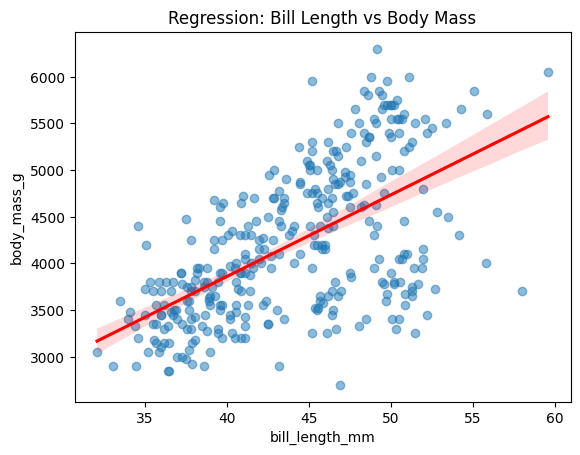

In [ ]:
sns.regplot(data=df, x="bill_length_mm", y="body_mass_g",
            scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title("Regression: Bill Length vs Body Mass")
plt.show()

**Pair Plot (`sns.pairplot`)**
A **pairplot** creates a grid of plots showing the pairwise relationships between **all numerical variables** in a dataset, with each variable on both axes once.
It’s useful for **exploratory data analysis** to quickly see correlations, clusters, and distributions.

**Your code:**

```python
sns.pairplot(data=df, hue="species", diag_kind="kde")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()
```

**What each argument does:**

* **`data=df`** → dataset (`penguins` in this case).
* **`hue="species"`** → colors points by penguin species, helping you see group patterns.
* **`diag_kind="kde"`** → uses a kernel density estimate (smooth curve) on the diagonal plots instead of histograms to show single-variable distributions.
* **`plt.suptitle(..., y=1.02)`** → adds a title above the whole grid, with `y` shifting it upward so it doesn’t overlap.

**How it works:**

* **Off-diagonal plots** → scatterplots showing relationships between two different features (e.g., bill length vs. flipper length).
* **Diagonal plots** → univariate distributions (KDE curves here) for each feature.
* The grid is symmetric: the plot in row `i`, column `j` is mirrored in row `j`, column `i`.

**Interpretation:**

* Look for **clusters** → species separated in certain plots means those features distinguish them well.
* Look for **trends** → if points form a line in a scatter, the features are correlated.
* Check **overlap** → heavy overlap in colors means species are similar in those features.

---

If you wanted to reduce the number of variables plotted (to focus on just a few), you could pass a `vars` list:

```python
sns.pairplot(df, vars=["bill_length_mm", "flipper_length_mm"], hue="species")
```


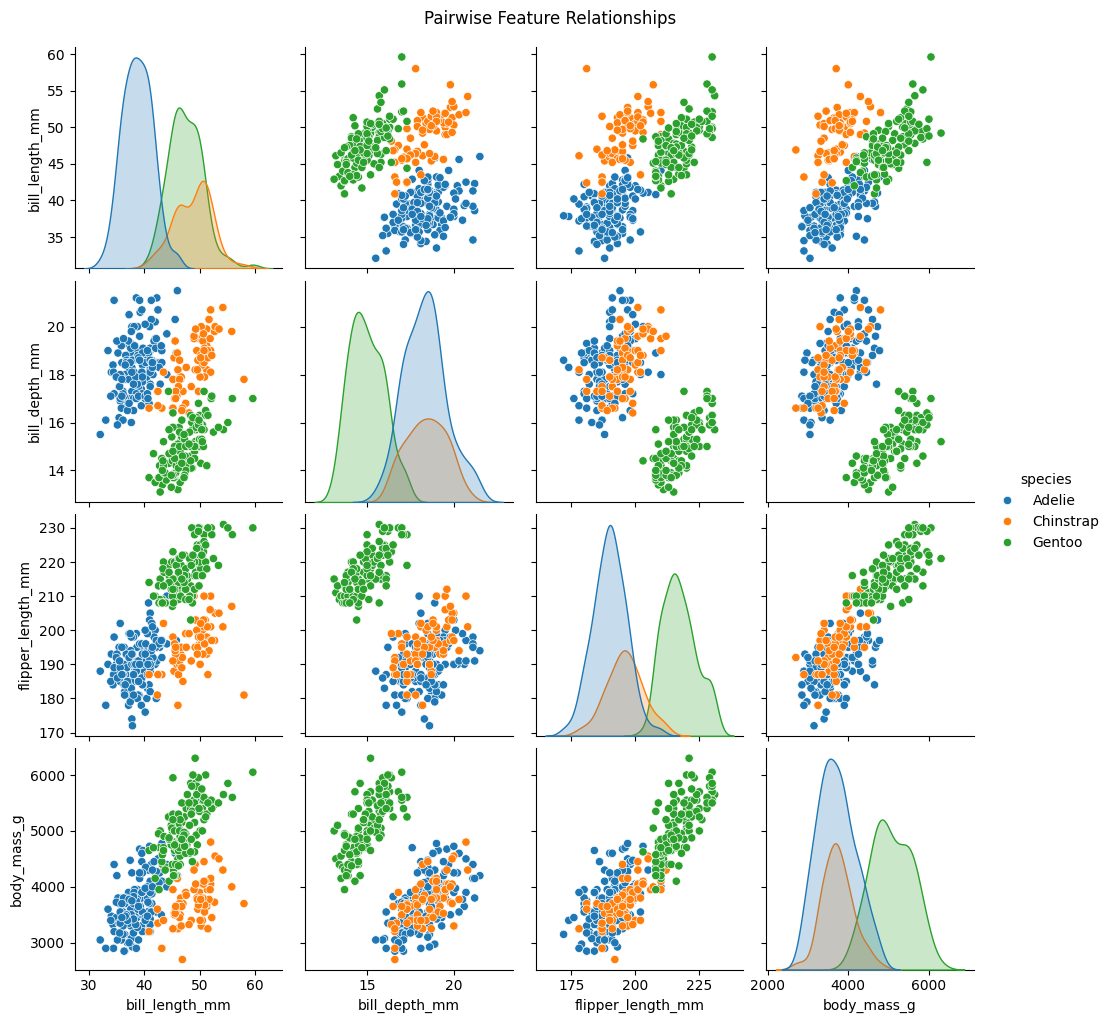

In [32]:
sns.pairplot(data=df, hue="species", diag_kind="kde")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

**Correlation Heatmap**
A correlation heatmap visualizes the **pairwise correlation coefficients** between numerical variables in a dataset as a colored matrix.
It helps quickly identify which features are strongly related.

**Your code:**

```python
numeric_df = df.select_dtypes(include='number')  # keep only numeric columns
corr = numeric_df.corr()                        # compute correlation matrix

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
```

**Step-by-step:**

1. **`df.select_dtypes(include='number')`** → keeps only numeric columns from the DataFrame.
2. **`.corr()`** → calculates correlation coefficients (default = Pearson correlation).
3. **`sns.heatmap(...)`** → draws a grid where:

   * **Color** → strength & direction of correlation

     * Blue (negative), Red (positive) with `coolwarm` palette.
   * **`annot=True`** → shows the numeric correlation values in each cell.
   * **`fmt=".2f"`** → formats numbers to 2 decimal places.
   * **`linewidths=0.5`** → thin white lines between cells for clarity.

**Interpretation:**

* Values range from **-1 to 1**:

  * `1.00` → perfect positive correlation (variables increase together).
  * `-1.00` → perfect negative correlation (one increases, the other decreases).
  * `0.00` → no linear relationship.
* Look for **strong correlations** (near ±1) to spot redundant features or important relationships.

---

If you only wanted correlations **above a certain threshold**, you could filter the matrix before plotting, for example:

```python
corr[corr.abs() < 0.5] = 0
```

to highlight only strong relationships.


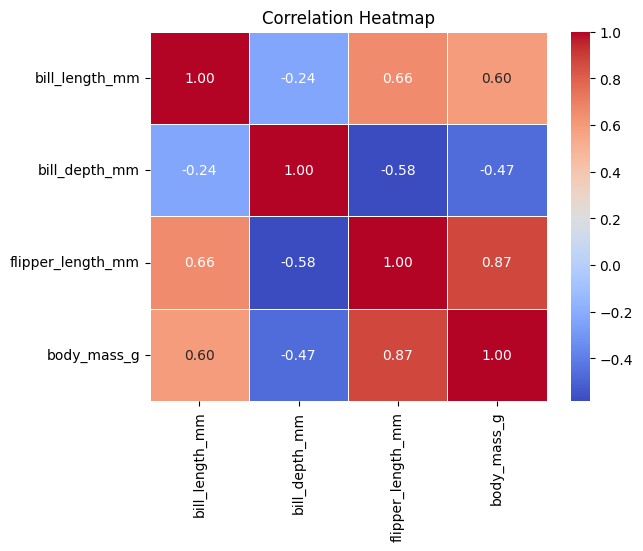

In [45]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Cluster Map (`sns.clustermap`)**
A **cluster map** is a heatmap that also performs **hierarchical clustering** on rows and/or columns, grouping similar variables together based on their values.
It’s especially useful for correlation matrices, as it rearranges variables so that highly correlated ones are placed close together.

**Your code:**

```python
sns.clustermap(corr, annot=True, cmap="viridis")
```

**What each argument does:**

* **`corr`** → the correlation matrix between numerical variables.
* **`annot=True`** → annotates each cell with its numeric value (note: in `clustermap`, this is handled differently than in `heatmap`, and may require a manual workaround for perfect alignment).
* **`cmap="viridis"`** → uses the *viridis* color palette, which is perceptually uniform and colorblind-friendly.

**How it works:**

* **Dendrograms** (tree diagrams) on the top and left show how variables are grouped based on similarity.
* Rows and columns are **reordered** so that similar variables are next to each other, making patterns more visible.
* The clustering algorithm typically uses Euclidean distance (on the correlation distances) and complete linkage, but you can change these with parameters like `metric` and `method`.

**Interpretation:**

* Blocks of similar colors along the diagonal indicate **clusters** of variables that are strongly related.
* Dendrogram branch length indicates how similar or different clusters are — shorter branches = more similarity.

---

If you want the annotations to be perfectly aligned in a `clustermap` (since `annot=True` in `clustermap` is not exactly like in `heatmap`), you’d need to draw a heatmap after reordering the correlation matrix based on the cluster map’s order.

Do you want me to give you that **annotated + clustered heatmap** version so values are perfectly aligned? That’s the common fix people use.


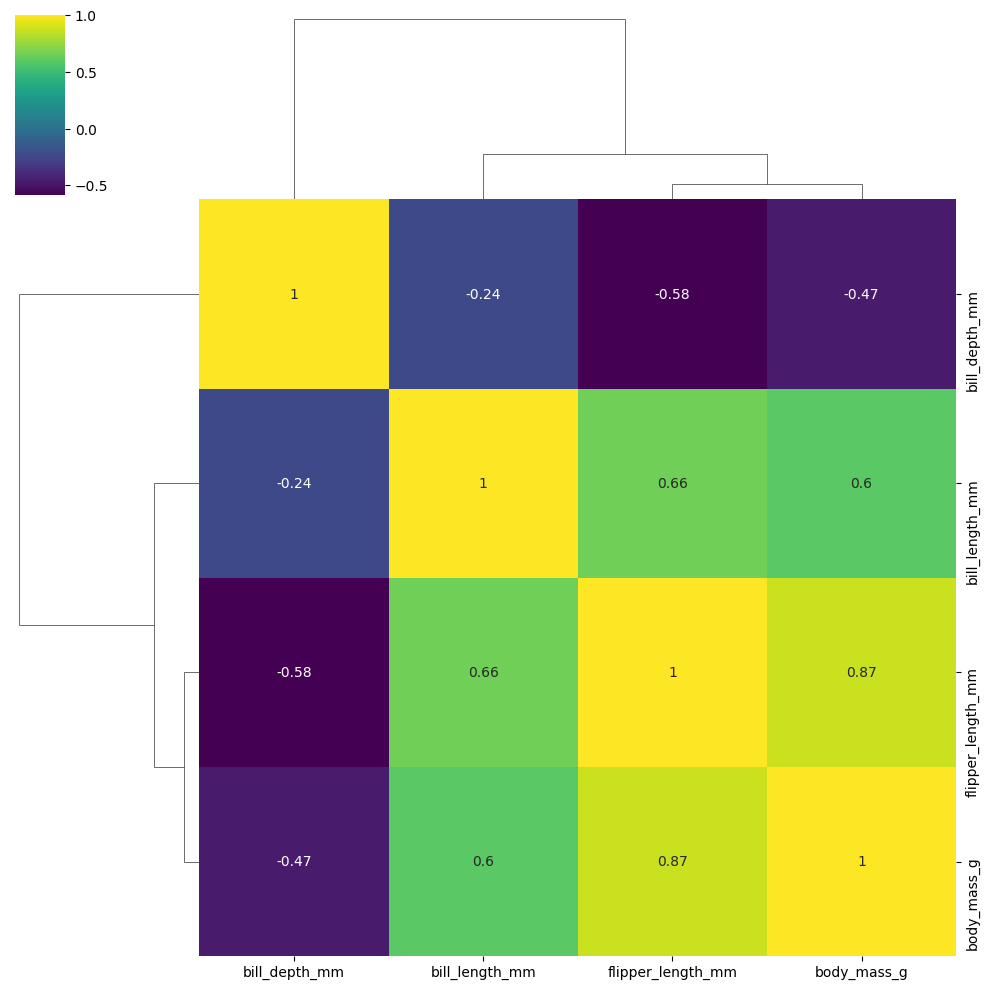

In [46]:
sns.clustermap(corr, annot=True, cmap="viridis")

# Real Project Usage Example: Iris Dataset

### **1. Pairplot**

```python
iris = sns.load_dataset("iris")

sns.pairplot(iris, hue="species")
plt.suptitle("Iris Dataset Feature Relationships", y=1.02)
plt.show()
```

**Purpose:**

* Shows **pairwise relationships** between all numerical features (`sepal_length`, `sepal_width`, `petal_length`, `petal_width`) of the Iris dataset.
* Uses **color coding (`hue`)** to separate points by `species`.

**Interpretation:**

* **Diagonal plots** → univariate distributions for each feature (histograms by default).
* **Off-diagonal scatterplots** → relationships between pairs of features.
* This makes it easy to see which features separate the species well (e.g., petal length vs petal width shows clear clustering).

---

### **2. Correlation Heatmap**

```python
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation - Iris")
plt.show()
```

**Purpose:**

* Displays a **correlation matrix** of the Iris dataset’s numerical features.
* Uses **Pearson correlation** by default.
* `annot=True` prints the correlation values in each cell.
* `cmap="YlGnBu"` applies a yellow–green–blue color scale.

**Interpretation:**

* Values close to **1.00** → strong positive correlation (features increase together).
* Values close to **-1.00** → strong negative correlation (one increases, the other decreases).
* Example: `petal_length` and `petal_width` have a **very high positive correlation** (\~0.96), meaning they carry very similar information.

---

If you want, I can show you **how to combine the pairplot and heatmap into one figure layout** so you have a single visualization panel instead of two separate plots. That’s often useful for presentations.


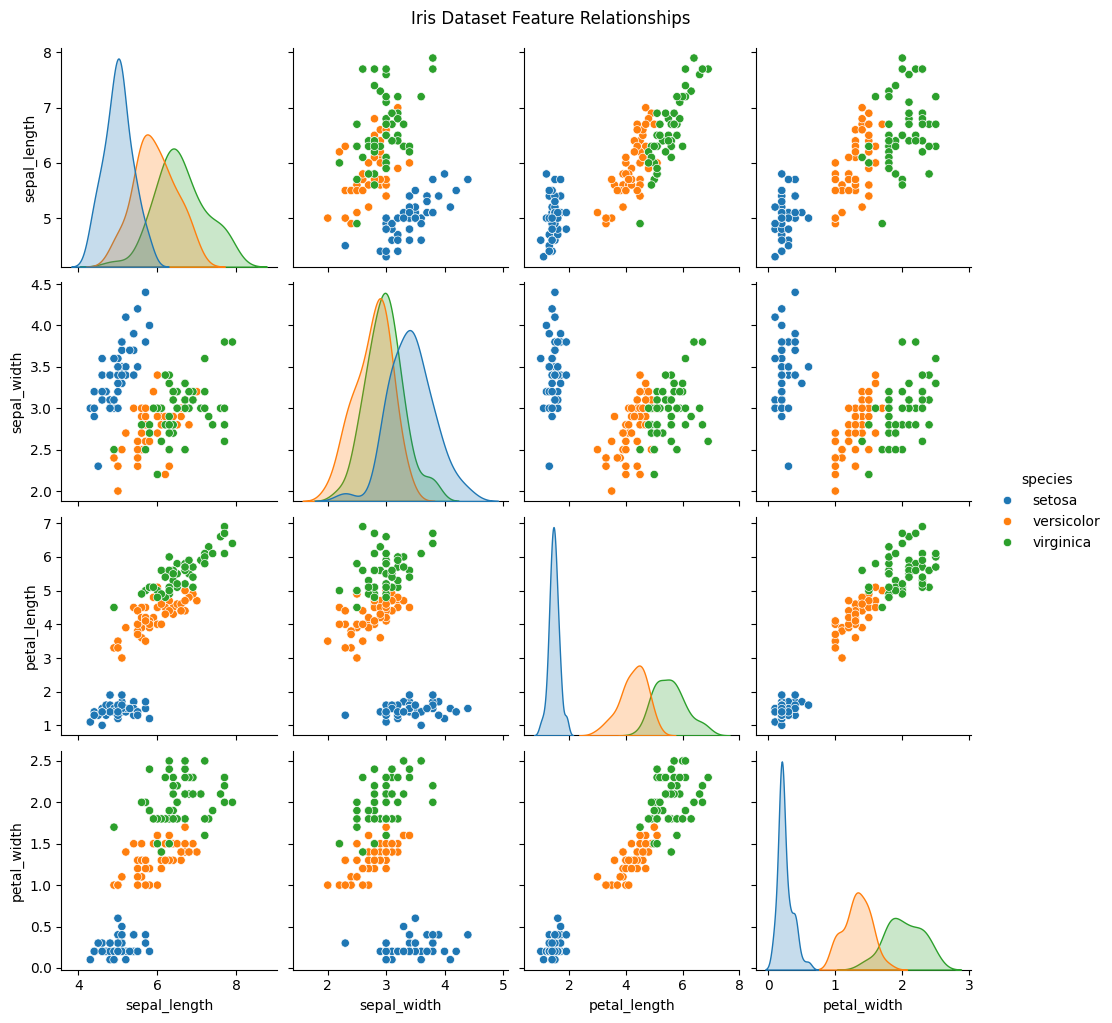

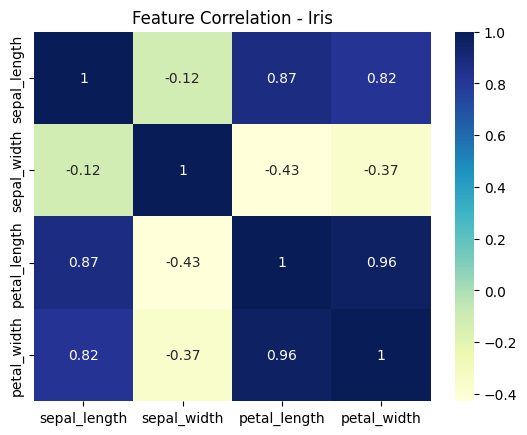

In [47]:
iris = sns.load_dataset("iris")

# Pairplot
sns.pairplot(iris, hue="species")
plt.suptitle("Iris Dataset Feature Relationships", y=1.02)
plt.show()

# Correlation heatmap
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation - Iris")
plt.show()

In [48]:
sns.set_style("whitegrid")       # 'white', 'dark', 'ticks', 'whitegrid'
sns.set_palette("Set2")          # Try 'pastel', 'dark', 'deep', etc.

**Line Plot (`sns.lineplot`)**
A line plot shows how a numerical variable changes **over time** or another continuous variable.
It’s especially common for **time series data** to reveal trends, seasonality, or cycles.

**Your code:**

```python
flights = sns.load_dataset("flights")

sns.lineplot(
    data=flights,
    x="year",             # time variable (treated as continuous)
    y="passengers",       # numerical measure (passenger counts)
    hue="month",          # separate lines by month
    palette="tab10"       # color palette for different months
)
plt.title("Airline Passengers Over Years")
plt.ylabel("Passengers")
plt.grid(True)
plt.show()
```

**What each argument does:**

* **`x="year"`** → X-axis represents years.
* **`y="passengers"`** → Y-axis represents the number of passengers.
* **`hue="month"`** → draws a separate line for each month, colored differently.
* **`palette="tab10"`** → assigns distinct colors for up to 10 months (cycling through if more).

**Interpretation:**

* Each line shows the **trend of passengers** for a specific month across years.
* You can see **seasonal differences** (some months have consistently more passengers).
* The general upward slope for most lines indicates airline passenger numbers increased over the years.

---

If you wanted this as a **true time series** (continuous date axis), you could combine `year` and `month` into a single datetime column before plotting — that way the months would be connected in order rather than separate lines per month.

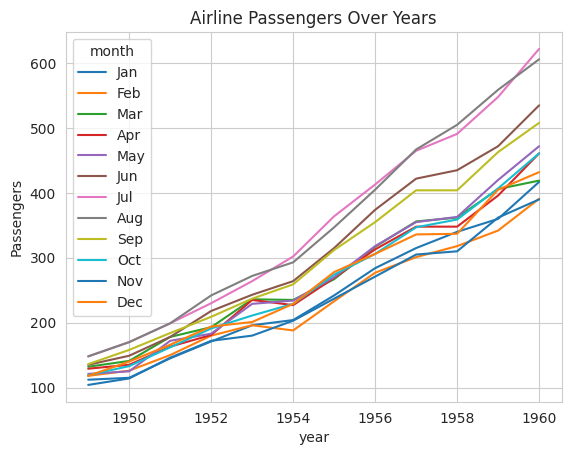

In [64]:
flights = sns.load_dataset("flights")

sns.lineplot(data=flights, x="year", y="passengers", hue="month", palette="tab10")
plt.title("Airline Passengers Over Years")
plt.ylabel("Passengers")
# plt.xlabel("Year")
plt.grid(True)
plt.show()

**Facet Grid (`sns.FacetGrid`)**
`FacetGrid` is a **figure-level** function in Seaborn that lets you create a grid of subplots based on one or more categorical variables, making it easy to compare distributions or relationships across subsets of the data.

**Your code:**

```python
titanic = sns.load_dataset("titanic")

g = sns.FacetGrid(titanic, col="sex", row="class", margin_titles=True)
g.map(sns.histplot, "age", bins=10, color="purple")

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Age Distribution by Gender & Class")
plt.show()
```

**What each part does:**

* **`col="sex"`** → creates separate columns for male and female passengers.
* **`row="class"`** → creates separate rows for passenger classes (First, Second, Third).
* **`margin_titles=True`** → places titles at the margins for cleaner labeling.
* **`.map(sns.histplot, "age", bins=10, color="purple")`** → applies a histogram plot of `age` to each grid cell, with 10 bins and purple color.
* **`plt.subplots_adjust(top=0.9)`** → leaves space at the top for a global title.
* **`g.fig.suptitle(...)`** → adds a title for the entire grid.

**Interpretation:**

* Each subplot represents **one subset** of passengers based on `sex` and `class`.
* The histogram in each panel shows how ages are distributed in that group.
* For example, you can easily see if First Class females had a different age distribution than Third Class males.

---

If you wanted to overlay additional information (like survival rate) in each subplot, you could use `g.map_dataframe()` and plot multiple layers in each facet. That’s a common way to make more insightful FacetGrid visualizations.


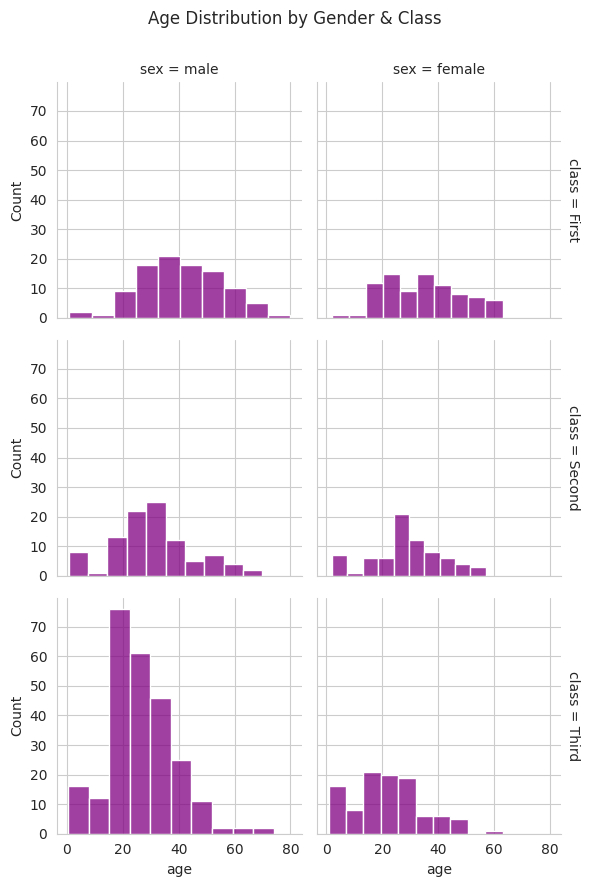

In [ ]:
titanic = sns.load_dataset("titanic")

g = sns.FacetGrid(titanic, col="sex", row="class", margin_titles=True)
g.map(sns.histplot, "age", bins=10, color="purple")

plt.subplots_adjust(top=0.9)
# g.fig.suptitle("Age Distribution by Gender & Class")
plt.suptitle("Age Distribution by Gender & Class")
plt.show()

**Confusion Matrix**
A **confusion matrix** is a table used to evaluate the performance of a classification model by comparing the model’s predictions to the actual labels.

* Rows represent **actual** classes.
* Columns represent **predicted** classes.

**Your code:**

```python
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["Cat", "Dog", "Horse"]
matrix = np.array([
    [45, 2, 3],   # Actual Cat
    [4, 50, 1],   # Actual Dog
    [2, 5, 43]    # Actual Horse
])

sns.heatmap(
    matrix,
    annot=True,        # show numbers in cells
    cmap="Blues",      # color palette
    fmt="d",           # integer formatting
    xticklabels=labels,  # column names
    yticklabels=labels   # row names
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
```

**Interpretation:**

* **Diagonal values** (top-left to bottom-right) → correct predictions.

  * Example: `45` means 45 Cats correctly predicted as Cat.
* **Off-diagonal values** → misclassifications.

  * Example: `2` in row "Cat", column "Dog" = 2 Cats wrongly classified as Dogs.
* Darker blue cells indicate **higher counts** (more occurrences).

**Key metrics from confusion matrix:**

* **Accuracy** = (sum of diagonal) / (total samples).
* **Precision, Recall, F1-score** can be calculated per class using these values.

---

If you wanted to **normalize** the confusion matrix (so it shows percentages instead of raw counts), you could divide each row by its sum and use `fmt=".2f"`. That’s often useful for comparing classes with different sample sizes.


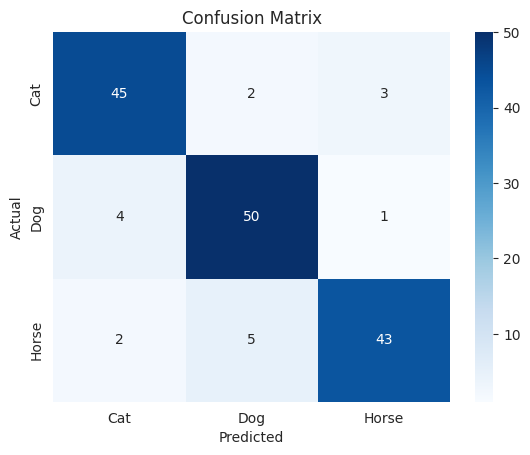

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

labels = ["Cat", "Dog", "Horse"]
matrix = np.array([[45, 2, 3],
                   [4, 50, 1],
                   [2, 5, 43]])

sns.heatmap(matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Histogram with KDE (`sns.histplot`)**
A histogram shows the **frequency distribution** of a numerical variable by grouping values into **bins**.
Here, you also included a **Kernel Density Estimate (KDE)** curve, which smooths the distribution into a continuous line for easier pattern recognition.

**Your code:**

```python
sns.set_theme(style="darkgrid", palette="muted")

plt.figure(figsize=(12, 6))
sns.histplot(data=titanic, x="age", hue="sex", kde=True)
plt.title("Age Distribution by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()
```

**What each part does:**

* **`sns.set_theme(...)`** → applies a dark grid background and muted color palette.
* **`figsize=(12, 6)`** → sets a wide aspect ratio for better readability.
* **`x="age"`** → variable to plot on the X-axis.
* **`hue="sex"`** → separates distributions by gender, coloring them differently.
* **`kde=True`** → overlays a smoothed KDE curve for each gender.
* **`plt.grid(True)`** → adds gridlines for readability.
* **`plt.tight_layout()`** → avoids overlap between labels and figure edges.

**Interpretation:**

* The **bars** show the number of passengers in each age range.
* The **overlapping colors** let you compare the male and female age distributions.
* The **KDE curves** make it easy to see peaks — for example, clusters of passengers in their 20s or 30s.

---

If you wanted to **normalize** the histogram so the Y-axis shows percentages instead of counts, you could add:

```python
sns.histplot(data=titanic, x="age", hue="sex", kde=True, stat="density")
```

That way, the KDE curve aligns perfectly with the bar heights.


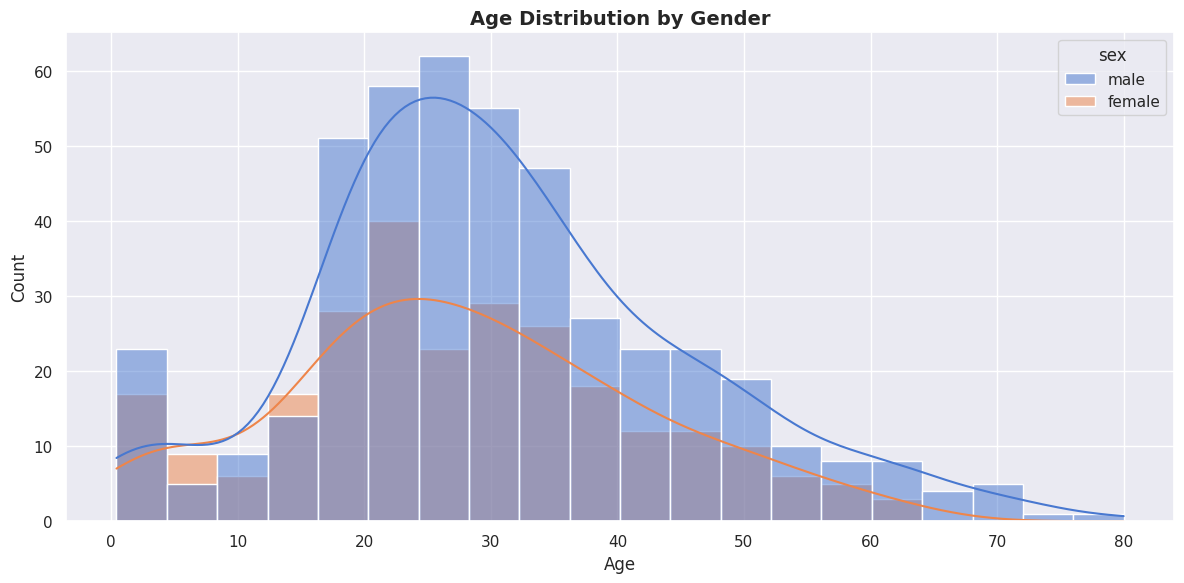

In [68]:
sns.set_theme(style="darkgrid", palette="muted")

plt.figure(figsize=(12, 6))
sns.histplot(data=titanic, x="age", hue="sex", kde=True)
plt.title("Age Distribution by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

**Boxplot with `plt.savefig`**

**Purpose:**

* A boxplot summarizes the distribution of a numerical variable across categories, showing median, quartiles, and outliers.
* `plt.savefig()` saves the figure to a file, so it can be used in reports, dashboards, or shared externally.

**Your code:**

```python
plt.figure(figsize=(10, 5))
sns.boxplot(data=titanic, x="class", y="age")
plt.title("Boxplot - Save Example")
plt.savefig("boxplot_dashboard.png", dpi=300)
```

**Step-by-step:**

1. **`plt.figure(figsize=(10, 5))`** → sets the figure size to 10 inches wide, 5 inches tall.
2. **`sns.boxplot(...)`** → plots passenger `age` distribution across `class` categories (First, Second, Third).
3. **`plt.title(...)`** → adds a title above the plot.
4. **`plt.savefig("boxplot_dashboard.png", dpi=300)`** →

   * Saves the plot as a PNG file named `boxplot_dashboard.png`.
   * `dpi=300` ensures **high resolution** (good for printing or dashboards).

**Result:**

* The plot will display on screen (unless `plt.close()` is used before), **and** be saved as a file in your working directory.

---

If you want the saved plot **without showing it** (e.g., in automated scripts), you could omit `plt.show()` and call `plt.close()` after saving to free memory:

```python
plt.savefig("boxplot_dashboard.png", dpi=300)
plt.close()
```


In [70]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=titanic, x="class", y="age")
plt.title("Boxplot - Save Example")
plt.savefig("boxplot_dashboard.png", dpi=300)
plt.close()

Your `set_my_theme()` function is basically a **custom Seaborn + Matplotlib style preset** so you don’t have to repeat formatting settings every time you make a plot.

---

**What it does:**

```python
def set_my_theme():
    sns.set_theme(style="whitegrid")       # White background with gridlines
    sns.set_palette("Set2")                # Pastel-like color palette
    plt.rcParams["axes.titlesize"] = 14     # Title font size
    plt.rcParams["axes.labelsize"] = 12     # Axis label font size
    plt.rcParams["figure.figsize"] = (10, 6) # Default figure size

set_my_theme()
```

**Effects:**

* **`sns.set_theme(style="whitegrid")`** → Applies Seaborn’s white background with light gridlines.
* **`sns.set_palette("Set2")`** → Changes the default plot colors to the “Set2” pastel color palette.
* **`plt.rcParams["axes.titlesize"] = 14`** → Makes plot titles moderately large.
* **`plt.rcParams["axes.labelsize"] = 12`** → Makes X/Y axis labels a bit larger than default.
* **`plt.rcParams["figure.figsize"] = (10, 6)`** → Sets default plot size to a medium landscape format.

**Why it’s useful:**

* Keeps your plots consistent across an entire notebook or project.
* You can call `set_my_theme()` once at the start and have all plots follow the same style.

---

If you wanted to **reset** to Seaborn defaults later, you could just run:

```python
sns.reset_defaults()
plt.rcParams.update(plt.rcParamsDefault)
```

In [71]:
def set_my_theme():
    sns.set_theme(style="whitegrid")
    sns.set_palette("Set2")
    plt.rcParams["axes.titlesize"] = 14
    plt.rcParams["axes.labelsize"] = 12
    plt.rcParams["figure.figsize"] = (10, 6)

set_my_theme()

Your example shows how to combine **Matplotlib’s figure/axes system** with **Seaborn plots** for more control over the layout and styling.

---

**What’s happening:**

```python
fig, ax = plt.subplots()  # Create a Matplotlib Figure and one Axes
sns.boxplot(data=titanic, x="sex", y="age", ax=ax)  # Pass Axes to Seaborn
ax.set_title("Matplotlib + Seaborn Combo")  # Set title via Matplotlib
plt.show()
```

**Explanation:**

* **`fig, ax = plt.subplots()`** → Creates a figure (`fig`) and an axes object (`ax`).
* **`sns.boxplot(..., ax=ax)`** → Tells Seaborn to draw the boxplot on this specific axes.
* **`ax.set_title(...)`** → Uses Matplotlib’s method to set the title for this axes.
* **`plt.show()`** → Renders the plot.

**Why use this combo?**

* Greater flexibility — you can control multiple subplots, custom tick labels, axis scaling, or mix different plot types in the same figure.
* Useful when building **multi-plot dashboards** with precise positioning.

**Example with multiple plots:**

```python
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=titanic, x="sex", y="age", ax=axes[0])
axes[0].set_title("Age by Gender")

sns.violinplot(data=titanic, x="sex", y="age", ax=axes[1])
axes[1].set_title("Age Distribution by Gender")

plt.tight_layout()
plt.show()
```

This approach is common when you want **side-by-side Seaborn visualizations** in one figure.

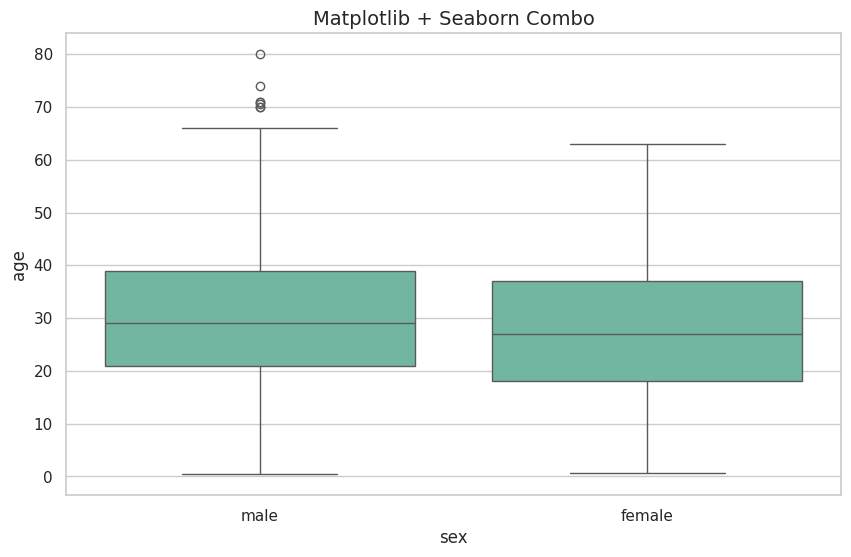

In [71]:
fig, ax = plt.subplots()
sns.boxplot(data=titanic, x="sex", y="age", ax=ax)
ax.set_title("Matplotlib + Seaborn Combo")
plt.show()

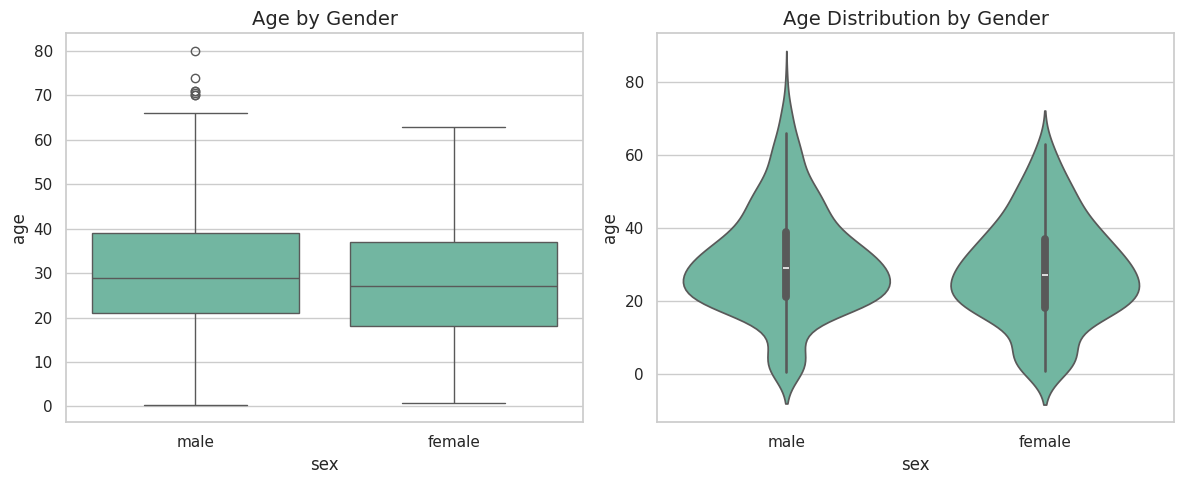

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=titanic, x="sex", y="age", ax=axes[0])
axes[0].set_title("Age by Gender")

sns.violinplot(data=titanic, x="sex", y="age", ax=axes[1])
axes[1].set_title("Age Distribution by Gender")

plt.tight_layout()
plt.show()